In [ ]:
#Version 1 using Grok API for the first time.
# Install required libraries
!pip install google-api-python-client
!pip install openai pandas

import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from openai import OpenAI

# Set up YouTube Data API
YOUTUBE_API_KEY = "Youtube_Data_API_key"  # Replace with your YouTube Data API key
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

# Set up xAI Grok API
XAI_API_KEY = "xai-key"  # Your xAI API key
client = OpenAI(
    api_key=XAI_API_KEY,
    base_url="https://api.x.ai/v1",
)

# Function to initialize YouTube API
def initialize_youtube_api():
    try:
        youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=YOUTUBE_API_KEY)
        return youtube
    except Exception as e:
        print(f"Failed to initialize YouTube API: {e}")
        return None

# Function to fetch YouTube comments
def get_video_comments(video_id, max_comments=100):
    youtube = initialize_youtube_api()
    if not youtube:
        return []

    comments = []
    try:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            textFormat="plainText"
        )
        while request and len(comments) < max_comments:
            response = request.execute()
            for item in response["items"]:
                comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
                comments.append(comment)
                if len(comments) >= max_comments:
                    break
            request = youtube.commentThreads().list_next(request, response)
    except HttpError as e:
        print(f"HTTP Error occurred: {e}")
        if "accessNotConfigured" in str(e):
            print("Please enable YouTube Data API v3 at: https://console.developers.google.com/apis/api/youtube.googleapis.com/overview")
        elif "commentsDisabled" in str(e):
            print("Comments are disabled for this video.")
        elif "quotaExceeded" in str(e):
            print("YouTube API quota exceeded. Check your quota at https://console.developers.google.com.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return comments

# Function to analyze sentiment using xAI Grok API
def analyze_sentiment_grok(comment):
    try:
        completion = client.chat.completions.create(
            model="grok-3",
            messages=[
                {
                    "role": "user",
                    "content": f"Analyze the sentiment of the following comment and classify it as Positive, Negative, or Neutral. Provide only the sentiment label in your response.\n\nComment: {comment}"
                }
            ]
        )
        sentiment = completion.choices[0].message.content.strip()
        return sentiment
    except Exception as e:
        print(f"Error analyzing sentiment for comment '{comment[:50]}...': {e}")
        return "Neutral"

# Main function to perform sentiment analysis
def main():
    # Replace with the YouTube video ID
    video_id = "ITmoJCA0DZo"  # From your previous attempt

    # Fetch comments
    print("Fetching comments...")
    comments = get_video_comments(video_id, max_comments=100)
    if not comments:
        print("No comments fetched. Check video ID, API key, or ensure comments are enabled for the video.")
        return

    # Analyze sentiments
    print("Analyzing sentiments...")
    sentiments = [analyze_sentiment_grok(comment) for comment in comments]

    # Create DataFrame
    df = pd.DataFrame({
        "Comment": comments,
        "Sentiment": sentiments
    })

    # Display results
    print("\nSentiment Analysis Results:")
    print(df)

    # Summary of sentiments
    sentiment_counts = df["Sentiment"].value_counts()
    print("\nSentiment Distribution:")
    print(sentiment_counts)

    # Save results to CSV
    df.to_csv("youtube_comments_sentiment.csv", index=False)
    print("\nResults saved to youtube_comments_sentiment.csv")

# Run the main function
if __name__ == "__main__":
    main()

Fetching comments...
Analyzing sentiments...

Sentiment Analysis Results:
                                              Comment Sentiment
0   సర్ ఎస్ మాస్టర్ తో తీస్తున్న సినిమా ఏమైంది. నే...  Positive
1   Single theater lo cinema ticket rate 100ruppie...  Negative
2   Veedu expired Metirial.. \nVidiki second marri...  Negative
3   Veedu expired Metirial.. \nVidiki second marri...  Negative
4   సార్ పని ఐపోయింది, ప్రతి సారీ మన టైమ్ నడవదు, క...  Negative
5   Meeru \n cenema lo fifty percent hero ki tagal...  Negative
6                             Allu Arjun Okkadu chalu  Positive
7   Mundu mega and gega compound ni pakkana pettu dil   Neutral
8                Pichi pk hits 1 ayeti flops 20 untai  Negative
9                                      Good interview  Positive
10          Pichi pk ni pakka na petti think cheyandi   Neutral
11          Pichi pk ni pakka na petti think cheyandi   Neutral
12  Ippati kyna buddi techukuni jagan cheppindi co...  Positive
13                            

In [ ]:
# This code takes in the video id as input
# Install required libraries
!pip install google-api-python-client
!pip install openai pandas

import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from openai import OpenAI

# Set up YouTube Data API
YOUTUBE_API_KEY = "YouTube_Data_API_key"  # Replace with your YouTube Data API key
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

# Set up xAI Grok API
XAI_API_KEY = "xai-key"  # Your xAI API key
client = OpenAI(
    api_key=XAI_API_KEY,
    base_url="https://api.x.ai/v1",
)

# Function to initialize YouTube API
def initialize_youtube_api():
    try:
        youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=YOUTUBE_API_KEY)
        return youtube
    except Exception as e:
        print(f"Failed to initialize YouTube API: {e}")
        return None

# Function to fetch YouTube comments
def get_video_comments(video_id, max_comments=100):
    youtube = initialize_youtube_api()
    if not youtube:
        return []

    comments = []
    try:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            textFormat="plainText"
        )
        while request and len(comments) < max_comments:
            response = request.execute()
            for item in response["items"]:
                comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
                comments.append(comment)
                if len(comments) >= max_comments:
                    break
            request = youtube.commentThreads().list_next(request, response)
    except HttpError as e:
        print(f"HTTP Error occurred: {e}")
        if "accessNotConfigured" in str(e):
            print("Please enable YouTube Data API v3 at: https://console.developers.google.com/apis/api/youtube.googleapis.com/overview")
        elif "commentsDisabled" in str(e):
            print("Comments are disabled for this video.")
        elif "quotaExceeded" in str(e):
            print("YouTube API quota exceeded. Check your quota at https://console.developers.google.com.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return comments

# Function to analyze sentiment using xAI Grok API
def analyze_sentiment_grok(comment):
    try:
        completion = client.chat.completions.create(
            model="grok-3",
            messages=[
                {
                    "role": "user",
                    "content": f"Analyze the sentiment of the following comment and classify it as Positive, Negative, or Neutral. Provide only the sentiment label in your response.\n\nComment: {comment}"
                }
            ]
        )
        sentiment = completion.choices[0].message.content.strip()
        return sentiment
    except Exception as e:
        print(f"Error analyzing sentiment for comment '{comment[:50]}...': {e}")
        return "Neutral"

# Main function to perform sentiment analysis
def main():
    # Prompt user for YouTube video ID
    video_id = input("Please enter the YouTube video ID: ").strip()

    # Validate video ID
    if not video_id:
        print("Error: No video ID provided.")
        return

    # Fetch comments
    print("Fetching comments...")
    comments = get_video_comments(video_id, max_comments=100)
    if not comments:
        print("No comments fetched. Check video ID, API key, or ensure comments are enabled for the video.")
        return

    # Analyze sentiments
    print("Analyzing sentiments...")
    sentiments = [analyze_sentiment_grok(comment) for comment in comments]

    # Create DataFrame
    df = pd.DataFrame({
        "Comment": comments,
        "Sentiment": sentiments
    })

    # Display results
    print("\nSentiment Analysis Results:")
    print(df)

    # Summary of sentiments
    sentiment_counts = df["Sentiment"].value_counts()
    print("\nSentiment Distribution:")
    print(sentiment_counts)

    # Save results to CSV
    df.to_csv("youtube_comments_sentiment.csv", index=False)
    print("\nResults saved to youtube_comments_sentiment.csv")

# Run the main function
if __name__ == "__main__":
    main()

Please enter the YouTube video ID: ITmoJCA0DZo
Fetching comments...
Analyzing sentiments...

Sentiment Analysis Results:
                                              Comment Sentiment
0   సర్ ఎస్ మాస్టర్ తో తీస్తున్న సినిమా ఏమైంది. నే...  Positive
1   Single theater lo cinema ticket rate 100ruppie...  Negative
2   Veedu expired Metirial.. \nVidiki second marri...  Negative
3   Veedu expired Metirial.. \nVidiki second marri...  Negative
4   సార్ పని ఐపోయింది, ప్రతి సారీ మన టైమ్ నడవదు, క...  Negative
5   Meeru \n cenema lo fifty percent hero ki tagal...  Negative
6                             Allu Arjun Okkadu chalu  Positive
7   Mundu mega and gega compound ni pakkana pettu dil   Neutral
8                Pichi pk hits 1 ayeti flops 20 untai  Negative
9                                      Good interview  Positive
10          Pichi pk ni pakka na petti think cheyandi  Negative
11          Pichi pk ni pakka na petti think cheyandi   Neutral
12  Ippati kyna buddi techukuni jagan cheppindi


Sentiment Summary:
Summary of 26 comments: Positive: 6 (23.1%), Negative: 14 (53.8%), Neutral: 6 (23.1%).


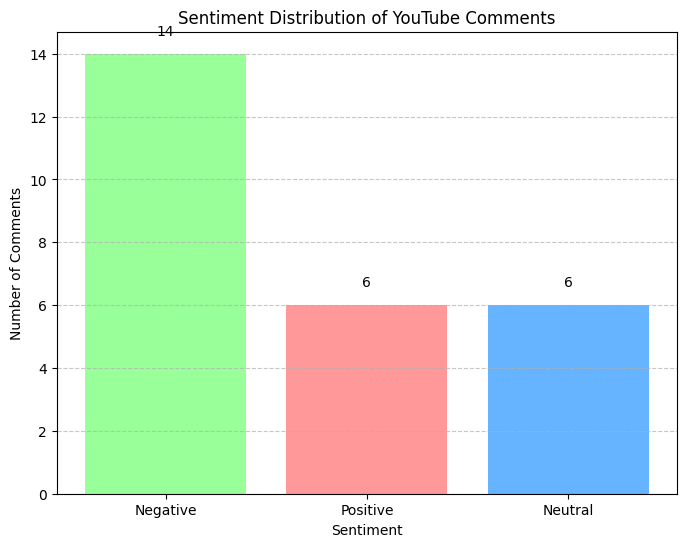

In [ ]:
# works on the csv from above.
# Install required libraries
!pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from DataFrame or CSV
def load_sentiment_data(df=None, csv_path="youtube_comments_sentiment.csv"):
    if df is not None:
        return df
    try:
        df = pd.read_csv(csv_path)
        return df
    except FileNotFoundError:
        print(f"Error: CSV file '{csv_path}' not found.")
        return None
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return None

# Function to summarize and visualize sentiment data
def summarize_and_visualize_sentiment(df=None, csv_path="youtube_comments_sentiment.csv"):
    # Load data
    df = load_sentiment_data(df, csv_path)
    if df is None:
        print("No data available to summarize or visualize.")
        return

    # Calculate sentiment counts
    sentiment_counts = df["Sentiment"].value_counts()

    # Generate summary
    total_comments = len(df)
    summary = (
        f"Summary of {total_comments} comments: "
        f"Positive: {sentiment_counts.get('Positive', 0)} ({sentiment_counts.get('Positive', 0)/total_comments*100:.1f}%), "
        f"Negative: {sentiment_counts.get('Negative', 0)} ({sentiment_counts.get('Negative', 0)/total_comments*100:.1f}%), "
        f"Neutral: {sentiment_counts.get('Neutral', 0)} ({sentiment_counts.get('Neutral', 0)/total_comments*100:.1f}%)."
    )
    print("\nSentiment Summary:")
    print(summary)

    # Generate bar chart
    labels = sentiment_counts.index
    counts = sentiment_counts.values
    colors = ['#99ff99', '#ff9999', '#66b3ff']  # Green for Positive, Red for Negative, Blue for Neutral

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=colors)
    plt.title("Sentiment Distribution of YouTube Comments")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Comments")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of bars
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

    plt.show()

# Example usage with DataFrame (integrate this into your previous script if desired)
def main(df=None):
    summarize_and_visualize_sentiment(df)

# Run the function (assuming CSV exists, or pass DataFrame from previous script)
if __name__ == "__main__":
    main()

In [ ]:
# Test code to check out XAI
from openai import OpenAI
XAI_API_KEY = "xai-key"  # Replace with your xAI Grok API key
client = OpenAI(
  api_key=XAI_API_KEY,
  base_url="https://api.x.ai/v1",
)

completion = client.chat.completions.create(
  model="grok-3",
  messages=[
    {"role": "user", "content": "What is the meaning of life, the universe, and everything?"}
  ]
)

In [ ]:
print (completion)

ChatCompletion(id='845ac09a-22c5-ee39-eab0-99716dad01e8', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The question "What is the meaning of life, the universe, and everything?" is famously associated with Douglas Adams\' science fiction series *The Hitchhiker\'s Guide to the Galaxy*. In the story, the supercomputer Deep Thought is asked this "ultimate question" and, after 7.5 million years of computation, provides the answer: **42**. However, Deep Thought explains that the answer is meaningless without understanding the actual question, which remains unknown in the narrative. This humorous take suggests that the search for meaning might be inherently absurd or beyond human comprehension.\n\nBeyond the fictional context, the question has been a central topic in philosophy, religion, and science for centuries. Here are a few perspectives on its meaning:\n\n1. **Philosophical Perspective**: Philosophers have long debated whether life